In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# Data generating processes

The data will come from either of two types of sources. 

1. Linear combination of sines and cosines
2. Linear combination of Legendre polynomials

defined on the interal $t \in [-\frac 1 2, +\frac 1 2]$

We are trying to check two hypoth. 

#### Hypoth 1: Data are explained as sum of sin & cos, Sines and Cosines (Fourier Series)
#### Hypoth 2: Data are exaplaied as Legendre Polynomials

Define features.... 
How did Dimitri create the data???? 

What model was used? Value of p is not known.... 
Which model has been used in genration the data? 

- Data is y and t
- y will be different in each family 1 & 2 
- t is is my space, when I am asked to predict y. 
- predict y from t 


# Notes: 
#### Cross-Validation 
MSE=Cost Function 
Cross Validation 

- split the datat 90% to train the model 
- MSE doesnt mean much since it goes to 0
    - Trainning MSE useless, because when p goes up the testing MSE goes down. Hence, it does not give us the details that we need to evaluate the model 
- how good the fit is our Theta
- use Theta to predict y and yhat
- cross-validation MSE tells us what is better


## Family 1: Sines and Cosines (Fourier Series)

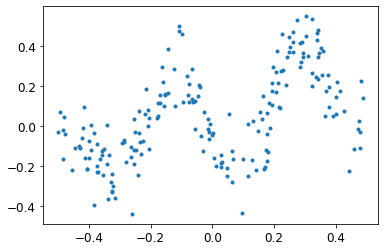

In [2]:
# produce training data
sigma = 0.1
n = 200 # number of samples 
np.random.seed(3)
t = np.random.rand(n) - 0.5
noise = sigma * np.random.randn(n)

t = np.random.rand(n) - 0.5

def features(t, p, n):
    return np.stack(
        [np.cos(f * 2*np.pi*t) for f in range(0, (p+1)//2)] +
        [np.sin(f * 2*np.pi*t) for f in range(1, (p+2)//2)])

p = 6   # number of features
X = features(t, p, n)  
theta = 0.1*np.random.randn(p) #weight 
y = theta @ X + noise   # training data 

plt.plot(t, y, '.')

In [3]:
t = np.round(t, 2)
y = np.round(y, 2)

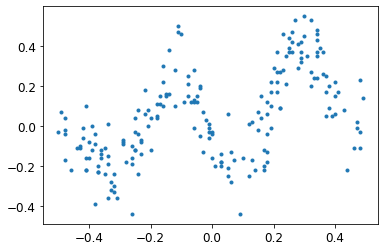

In [4]:
plt.plot(t, y, '.')

## Family 2: Legendre Polynomials

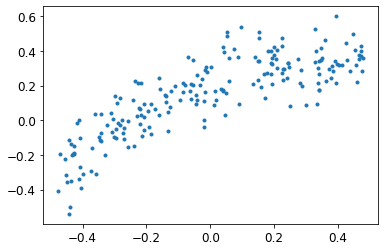

In [5]:
from scipy.special import legendre

# produce training data

sigma = 0.1
n = 200
np.random.seed(3)
t = np.random.rand(n) - 0.5
noise = sigma * np.random.randn(n)

def features(t, p, n):
    return np.stack(
        [legendre(d)(t) for d in range(p)])

p = 6  # number of features
X = features(t, p, n)
theta = 0.4*np.random.randn(p) #weight / hidden we do not know, we find it by fitting 
y = theta @ X + noise   # training data 

plt.plot(t, y, '.')

# Assignment 

Due Oct 29

Given some points $(t, y)$, find the model that will predict $y$ from $t$ for new data sampled from the same process. Assume Gaussian noise. Assume that the data are 

The data come from one of the models above but the degree `p` is unknown. 

In [6]:
t = np.array([-0.49,  0.48, -0.19,  0.24, -0.08,  0.49, -0.21, -0.16, -0.13,
        0.5 ,  0.09,  0.14, -0.27,  0.01,  0.37, -0.42, -0.45, -0.14,
        0.17,  0.14, -0.38,  0.18, -0.45, -0.3 , -0.12,  0.02, -0.11,
        0.38, -0.01,  0.12,  0.44,  0.32,  0.2 , -0.26,  0.04,  0.23,
        0.18,  0.14,  0.15, -0.21, -0.41,  0.06, -0.25, -0.31, -0.42,
       -0.09,  0.34, -0.05,  0.21,  0.26,  0.27,  0.27, -0.28, -0.49,
        0.01,  0.29, -0.15,  0.34,  0.49,  0.03, -0.12,  0.15, -0.02,
       -0.02,  0.24,  0.47, -0.06,  0.34, -0.29, -0.43, -0.09,  0.14,
        0.23,  0.23,  0.08,  0.12, -0.42, -0.12, -0.19,  0.45, -0.36,
       -0.08,  0.13, -0.16,  0.23,  0.44,  0.5 , -0.3 ,  0.45, -0.24,
       -0.42,  0.28,  0.11, -0.47,  0.11, -0.27,  0.41,  0.46, -0.36,
       -0.32, -0.05,  0.45, -0.08, -0.39, -0.34, -0.37,  0.32, -0.24,
       -0.44, -0.03, -0.4 ,  0.47,  0.27, -0.32, -0.2 , -0.37, -0.13,
       -0.07,  0.08, -0.44, -0.44,  0.43, -0.04,  0.09,  0.35, -0.02,
       -0.12,  0.42, -0.39, -0.25, -0.45,  0.44, -0.02,  0.31, -0.48,
        0.23, -0.07, -0.17,  0.4 ,  0.35, -0.2 ,  0.45, -0.1 ,  0.17,
        0.21, -0.11, -0.3 ,  0.48,  0.31,  0.21,  0.2 ,  0.27,  0.47,
       -0.39,  0.46,  0.31,  0.23,  0.5 , -0.43,  0.13, -0.34,  0.02,
       -0.27,  0.3 , -0.18,  0.41,  0.17, -0.15,  0.29, -0.05, -0.39,
        0.25,  0.28,  0.02, -0.21,  0.11,  0.16,  0.47,  0.1 ,  0.03,
        0.22,  0.43,  0.16, -0.21, -0.16,  0.39,  0.25,  0.04, -0.4 ,
        0.22,  0.46,  0.12,  0.15,  0.48, -0.48, -0.15, -0.42,  0.28,
       -0.36,  0.31])


In [7]:
y = np.array([-0.06, -0.09, -0.19,  0.  , -0.03, -0.18, -0.12, -0.31, -0.17,
       -0.18,  0.09,  0.16, -0.28,  0.15, -0.04,  0.04,  0.06, -0.28,
        0.18,  0.11,  0.27,  0.34,  0.11, -0.22, -0.18,  0.39, -0.29,
       -0.06,  0.1 ,  0.08, -0.  , -0.02,  0.06, -0.35,  0.16,  0.28,
       -0.03,  0.17,  0.37, -0.15,  0.19,  0.21, -0.29, -0.33,  0.08,
       -0.24,  0.06,  0.02,  0.26,  0.07,  0.1 ,  0.09, -0.52,  0.03,
        0.3 ,  0.1 , -0.15, -0.26, -0.26,  0.1 , -0.27,  0.11,  0.02,
        0.1 ,  0.09, -0.23, -0.03, -0.21, -0.4 , -0.04, -0.17,  0.07,
        0.08,  0.15,  0.27,  0.41,  0.07, -0.31, -0.29, -0.3 ,  0.06,
       -0.1 ,  0.08, -0.29,  0.07, -0.2 ,  0.06, -0.25, -0.13, -0.34,
        0.05,  0.21,  0.07,  0.13,  0.32, -0.26, -0.01, -0.17, -0.31,
       -0.21,  0.11, -0.1 , -0.01,  0.16, -0.01,  0.1 , -0.1 , -0.28,
        0.08, -0.09,  0.04, -0.07, -0.11, -0.35, -0.23,  0.05, -0.25,
       -0.12,  0.15,  0.01,  0.17,  0.02, -0.01,  0.04, -0.21,  0.03,
       -0.15,  0.08,  0.08, -0.38,  0.19, -0.18,  0.13, -0.03,  0.1 ,
        0.1 , -0.05, -0.29, -0.36,  0.12, -0.42, -0.32, -0.  ,  0.22,
        0.  , -0.36, -0.33,  0.06, -0.04,  0.18, -0.08, -0.22, -0.25,
        0.09, -0.03, -0.17,  0.02, -0.09,  0.13,  0.24, -0.04,  0.15,
       -0.44, -0.02, -0.24,  0.09,  0.17, -0.35, -0.15, -0.1 ,  0.08,
        0.  ,  0.09,  0.22, -0.38,  0.06,  0.14, -0.26,  0.19,  0.41,
        0.13, -0.13,  0.3 , -0.15, -0.02, -0.09, -0.07,  0.31,  0.04,
       -0.02, -0.05,  0.07,  0.16, -0.21,  0.01, -0.2 , -0.09,  0.11,
        0.08, -0.  ])

Text(0, 0.5, 'y')

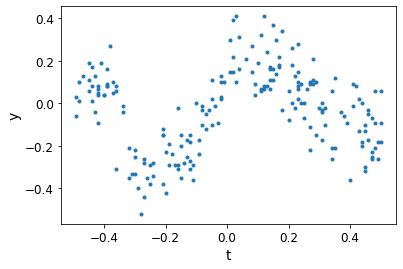

In [8]:
plt.plot(t, y, '.')
plt.xlabel('t')
plt.ylabel('y')

### Steps
1. Select performance measure (cost function):  Use MSE.
2. Implement linear regression for the two models: Assume known model and number of features p, find the parameters theta.
3. Visualize the fit and print the training cost function.
4. Fit with a different model and a different p.
5. Use 10-fold cross-validation to compare models.  Measure average cross-validated MSE.  Output: best model and best `p`.
6. (In class or evaluation) use the testing data set to test the perfomance. 

### 1. Select performance measure (cost function):  Use MSE.

In [9]:
X

array([[ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ],
       [ 0.0507979 ,  0.20814782, -0.20909526, ..., -0.43772052,
         0.38424143, -0.05418982],
       [-0.49612936, -0.43501173, -0.43441876, ..., -0.21260112,
        -0.27853778, -0.49559519],
       [-0.07586915, -0.28967645,  0.29078835, ...,  0.44691347,
        -0.43453722,  0.08088691],
       [ 0.36535253,  0.22074163,  0.21940975, ..., -0.18288975,
        -0.08328926,  0.36402571],
       [ 0.09410178,  0.31444556, -0.31521025, ..., -0.2134325 ,
         0.29002404, -0.1002172 ]])

In [10]:
t

array([-0.49,  0.48, -0.19,  0.24, -0.08,  0.49, -0.21, -0.16, -0.13,
        0.5 ,  0.09,  0.14, -0.27,  0.01,  0.37, -0.42, -0.45, -0.14,
        0.17,  0.14, -0.38,  0.18, -0.45, -0.3 , -0.12,  0.02, -0.11,
        0.38, -0.01,  0.12,  0.44,  0.32,  0.2 , -0.26,  0.04,  0.23,
        0.18,  0.14,  0.15, -0.21, -0.41,  0.06, -0.25, -0.31, -0.42,
       -0.09,  0.34, -0.05,  0.21,  0.26,  0.27,  0.27, -0.28, -0.49,
        0.01,  0.29, -0.15,  0.34,  0.49,  0.03, -0.12,  0.15, -0.02,
       -0.02,  0.24,  0.47, -0.06,  0.34, -0.29, -0.43, -0.09,  0.14,
        0.23,  0.23,  0.08,  0.12, -0.42, -0.12, -0.19,  0.45, -0.36,
       -0.08,  0.13, -0.16,  0.23,  0.44,  0.5 , -0.3 ,  0.45, -0.24,
       -0.42,  0.28,  0.11, -0.47,  0.11, -0.27,  0.41,  0.46, -0.36,
       -0.32, -0.05,  0.45, -0.08, -0.39, -0.34, -0.37,  0.32, -0.24,
       -0.44, -0.03, -0.4 ,  0.47,  0.27, -0.32, -0.2 , -0.37, -0.13,
       -0.07,  0.08, -0.44, -0.44,  0.43, -0.04,  0.09,  0.35, -0.02,
       -0.12,  0.42,

In [11]:
y

array([-0.06, -0.09, -0.19,  0.  , -0.03, -0.18, -0.12, -0.31, -0.17,
       -0.18,  0.09,  0.16, -0.28,  0.15, -0.04,  0.04,  0.06, -0.28,
        0.18,  0.11,  0.27,  0.34,  0.11, -0.22, -0.18,  0.39, -0.29,
       -0.06,  0.1 ,  0.08, -0.  , -0.02,  0.06, -0.35,  0.16,  0.28,
       -0.03,  0.17,  0.37, -0.15,  0.19,  0.21, -0.29, -0.33,  0.08,
       -0.24,  0.06,  0.02,  0.26,  0.07,  0.1 ,  0.09, -0.52,  0.03,
        0.3 ,  0.1 , -0.15, -0.26, -0.26,  0.1 , -0.27,  0.11,  0.02,
        0.1 ,  0.09, -0.23, -0.03, -0.21, -0.4 , -0.04, -0.17,  0.07,
        0.08,  0.15,  0.27,  0.41,  0.07, -0.31, -0.29, -0.3 ,  0.06,
       -0.1 ,  0.08, -0.29,  0.07, -0.2 ,  0.06, -0.25, -0.13, -0.34,
        0.05,  0.21,  0.07,  0.13,  0.32, -0.26, -0.01, -0.17, -0.31,
       -0.21,  0.11, -0.1 , -0.01,  0.16, -0.01,  0.1 , -0.1 , -0.28,
        0.08, -0.09,  0.04, -0.07, -0.11, -0.35, -0.23,  0.05, -0.25,
       -0.12,  0.15,  0.01,  0.17,  0.02, -0.01,  0.04, -0.21,  0.03,
       -0.15,  0.08,

In [12]:
X.T

array([[ 1.        ,  0.0507979 , -0.49612936, -0.07586915,  0.36535253,
         0.09410178],
       [ 1.        ,  0.20814782, -0.43501173, -0.28967645,  0.22074163,
         0.31444556],
       [ 1.        , -0.20909526, -0.43441876,  0.29078835,  0.21940975,
        -0.31521025],
       ...,
       [ 1.        , -0.43772052, -0.21260112,  0.44691347, -0.18288975,
        -0.2134325 ],
       [ 1.        ,  0.38424143, -0.27853778, -0.43453722, -0.08328926,
         0.29002404],
       [ 1.        , -0.05418982, -0.49559519,  0.08088691,  0.36402571,
        -0.1002172 ]])

In [13]:
X.shape

(6, 200)

In [14]:
#need to create lin_reg for MSE
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X.T,y)

LinearRegression()

In [15]:
help(lin_reg.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : returns an instance of self.



In [16]:
from sklearn.metrics import mean_squared_error

In [17]:
#creating MSE
Y_recall = lin_reg.predict(X.T) #our data, predict what y should be

In [18]:
Y_recall

array([-0.01101616, -0.04300641, -0.02460819, -0.00781069, -0.06836065,
       -0.06790691, -0.02186393, -0.03119978,  0.0122222 , -0.00795903,
        0.02860179, -0.00731161, -0.02836555, -0.02611285, -0.03489672,
       -0.01660666,  0.03367072, -0.01195481, -0.02818785, -0.00966819,
       -0.02551519, -0.03915863, -0.00797723, -0.02814636, -0.01036491,
       -0.06039849, -0.02261631, -0.0308431 , -0.01224044, -0.05787671,
       -0.03797497, -0.03393638, -0.0668624 , -0.06971789, -0.01334894,
       -0.01030534, -0.02935957, -0.01183146, -0.01532288, -0.03071122,
       -0.01040439, -0.00705397, -0.02715606, -0.02449682, -0.00728679,
       -0.07021217, -0.01584912, -0.02551967, -0.02617224, -0.00738058,
       -0.03121066, -0.03120652, -0.00797775, -0.00808072, -0.0070219 ,
       -0.0152466 , -0.0428879 , -0.05275526, -0.03863737, -0.03815089,
       -0.01386022, -0.0328916 , -0.01813431, -0.0138033 , -0.02001612,
       -0.00775053,  0.00569477, -0.0296335 , -0.04074949, -0.03

In [19]:
X.T

array([[ 1.        ,  0.0507979 , -0.49612936, -0.07586915,  0.36535253,
         0.09410178],
       [ 1.        ,  0.20814782, -0.43501173, -0.28967645,  0.22074163,
         0.31444556],
       [ 1.        , -0.20909526, -0.43441876,  0.29078835,  0.21940975,
        -0.31521025],
       ...,
       [ 1.        , -0.43772052, -0.21260112,  0.44691347, -0.18288975,
        -0.2134325 ],
       [ 1.        ,  0.38424143, -0.27853778, -0.43453722, -0.08328926,
         0.29002404],
       [ 1.        , -0.05418982, -0.49559519,  0.08088691,  0.36402571,
        -0.1002172 ]])

In [20]:
lin_mse = mean_squared_error(y,Y_recall) # we predict the y
lin_rmse = np.sqrt(lin_mse)
lin_rmse #will continue to decrease when p increases 
#YHat 
#use part of the data, split the data to a smaller 


0.18883691181691384

In [21]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y, Y_recall)
lin_mae



0.15632257672428548

### Feedback: it is not useful and doesnt help us to find theta

### 2. Implement linear regression for the two models: Assume known model and number of features p, find the parameters theta.

In [22]:
# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(t, y)

ValueError: Expected 2D array, got 1D array instead:
array=[-0.49  0.48 -0.19  0.24 -0.08  0.49 -0.21 -0.16 -0.13  0.5   0.09  0.14
 -0.27  0.01  0.37 -0.42 -0.45 -0.14  0.17  0.14 -0.38  0.18 -0.45 -0.3
 -0.12  0.02 -0.11  0.38 -0.01  0.12  0.44  0.32  0.2  -0.26  0.04  0.23
  0.18  0.14  0.15 -0.21 -0.41  0.06 -0.25 -0.31 -0.42 -0.09  0.34 -0.05
  0.21  0.26  0.27  0.27 -0.28 -0.49  0.01  0.29 -0.15  0.34  0.49  0.03
 -0.12  0.15 -0.02 -0.02  0.24  0.47 -0.06  0.34 -0.29 -0.43 -0.09  0.14
  0.23  0.23  0.08  0.12 -0.42 -0.12 -0.19  0.45 -0.36 -0.08  0.13 -0.16
  0.23  0.44  0.5  -0.3   0.45 -0.24 -0.42  0.28  0.11 -0.47  0.11 -0.27
  0.41  0.46 -0.36 -0.32 -0.05  0.45 -0.08 -0.39 -0.34 -0.37  0.32 -0.24
 -0.44 -0.03 -0.4   0.47  0.27 -0.32 -0.2  -0.37 -0.13 -0.07  0.08 -0.44
 -0.44  0.43 -0.04  0.09  0.35 -0.02 -0.12  0.42 -0.39 -0.25 -0.45  0.44
 -0.02  0.31 -0.48  0.23 -0.07 -0.17  0.4   0.35 -0.2   0.45 -0.1   0.17
  0.21 -0.11 -0.3   0.48  0.31  0.21  0.2   0.27  0.47 -0.39  0.46  0.31
  0.23  0.5  -0.43  0.13 -0.34  0.02 -0.27  0.3  -0.18  0.41  0.17 -0.15
  0.29 -0.05 -0.39  0.25  0.28  0.02 -0.21  0.11  0.16  0.47  0.1   0.03
  0.22  0.43  0.16 -0.21 -0.16  0.39  0.25  0.04 -0.4   0.22  0.46  0.12
  0.15  0.48 -0.48 -0.15 -0.42  0.28 -0.36  0.31].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
# Make a prediction
t_new = [[6666]]
print(model.predict(t_new)) 

In [ ]:
plt.plot(t, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()

In [ ]:
T_b = np.c_[np.ones((200, 1)), t]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(T_b.T.dot(T_b)).dot(T_b.T).dot(y)

In [ ]:
theta_best

In [ ]:
T_new = np.array([[0], [2]])
T_new_b = np.c_[np.ones((2, 1)), T_new]  # add x0 = 1 to each instance
y_predict = T_new_b.dot(theta_best)
y_predict

In [ ]:
T_new

In [ ]:
y_predict

In [ ]:
plt.plot(T_new, y_predict, "r-") #r- make the line red
plt.plot(t, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()

#what just happened? why do i have negative numbers? 

In [ ]:
plt.plot(T_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(t, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.show()

#it looks weird.... 

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(t, y)
lin_reg.intercept_, lin_reg.coef_

In [ ]:
lin_reg.predict(t_new)

In [ ]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(T_b, y, rcond=1e-6)
theta_best_svd

In [ ]:
np.linalg.pinv(T_b).dot(y)

In [ ]:
#not sure what happened 